In [1]:
using Random, Distributions, Plots, PlotThemes, LaTeXStrings, Printf
nothing

In [2]:
theme(:vibrant)

Plots.PlotThemes.theme_palette(:vibrant)

In [3]:
pal = Plots.PlotThemes.theme_palette(:vibrant)

pal = pal[[1,4,3]]

In [4]:
γ  = 0.5
ω² = 1.5
κ  = 5

function f(X,V,Y)
    dX = V
    dV = -ω²*X - γ*V + κ*Y
    return dX, dV
end

f (generic function with 1 method)

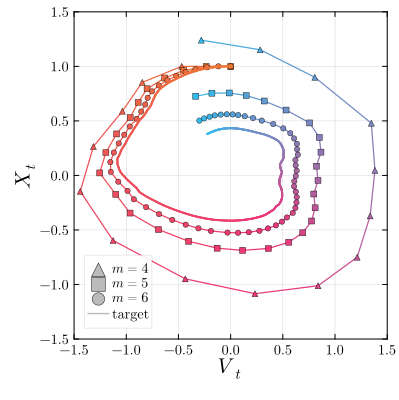

In [5]:
#markers = [:utriangle, :square, :pentagon, :circle]
markers = [:utriangle, :square, :circle]

function Euler_method_path_plot(T, min_grid_exponent, max_grid_exponent, fine_grid_exponent)
    fine_grid_size = 2^fine_grid_exponent+1
    fine_grid_step = T/(fine_grid_size-1)
    fine_grid = collect(0:fine_grid_step:T)
    
    OU = Vector{Float64}(undef, fine_grid_size)
    OU_random_increments = Vector{Float64}(undef, fine_grid_size-1)
    P = zeros(fine_grid_size)

    X_exact = Vector{Float64}(undef, fine_grid_size)
    V_exact = Vector{Float64}(undef, fine_grid_size)
        
    ν = 1
    σ = 0.25
    
    s = σ * sqrt((1 - exp(-2*ν*fine_grid_step))/(2*ν))

    rand!(rng, Normal(0,s), OU_random_increments)
    
    OU[1] = 0
    
    for i in 1:fine_grid_size-1
        OU[i+1] = OU[i] * exp(-ν*fine_grid_step) + OU_random_increments[i]
    end
    
    elapsed_t = 0

    while elapsed_t <= T
        elapsed_t += rand(rng, Exponential(0.2))
        P +=  rand(rng, Uniform(-0.45,0.45)) .* (fine_grid .>= elapsed_t) 
    end
    
    Y = OU .* P
    
    X_0 = 1
    V_0 = 0
    
    X_exact[1] = X_0
    V_exact[1] = V_0
    
    for i in 1:fine_grid_size-1
        dX, dV = f(X_exact[i], V_exact[i], Y[i])
        X_exact[i+1] = X_exact[i] + fine_grid_step * dX
        V_exact[i+1] = V_exact[i] + fine_grid_step * dV
    end
    
    pal = Plots.PlotThemes.theme_palette(:vibrant)
    pal_grad = pal[[1,4,3]]
    
    pl1 = plot(title="", xlabel=L"V_t", ylabel=L"X_t", ylim=(-1.5,1.5), yticks=-3:0.5:3, xlim=(-1.5,1.5), xticks=-3:0.5:3,
            size=(400,400), grid=true, minorgrid=false, framestyle=:box,
            fontfamily="Computer Modern", titlefontsize=10, legendfontsize=9, xlabelfontsize=14, ylabelfontsize=14,
            xtickfont=font(9, "Computer Modern"), ytickfont=font(9, "Computer Modern"), legend=:bottomleft)
        
    for grid_exponent in min_grid_exponent:max_grid_exponent
        grid_size = 2^grid_exponent + 1
        grid_step = T/(grid_size-1)
        grid_indexes = 1:2^(fine_grid_exponent - grid_exponent):fine_grid_size
            
        X_Euler = Vector{Float64}(undef, grid_size)
        V_Euler = Vector{Float64}(undef, grid_size)
          
        X_Euler[1] = X_0
        V_Euler[1] = V_0
        
        for i in 1:grid_size-1
            dX, dV = f(X_Euler[i], V_Euler[i], Y[grid_indexes[i]])
            X_Euler[i+1] = X_Euler[i] + grid_step * dX
            V_Euler[i+1] = V_Euler[i] + grid_step * dV
        end
        
        for i in 1:grid_size-1
            plot!(pl1, [V_Euler[i], V_Euler[i+1]], [X_Euler[i], X_Euler[i+1]], label="", 
                color=cgrad(pal_grad)[i/grid_size], linewidth=1.25)
        end
        
        scatter!(pl1, V_Euler, X_Euler, label="", color=cgrad(pal_grad)[range(0,1,grid_size)],
            marker=markers[grid_exponent-min_grid_exponent+1], markersize=3, markerstrokewidth=0.5, markerstrokecolor=:black)
        
        scatter!(pl1, [10], [10], label=L"m ="*string(grid_exponent), color=pal[7],
            marker=markers[grid_exponent-min_grid_exponent+1], markersize=6, markerstrokewidth=0.5, markerstrokecolor=:black)
    end
    
    plot_grid_exponent = 10
    plot_grid_size = 2^plot_grid_exponent+1
    plot_grid_indexes = 1:2^(fine_grid_exponent - plot_grid_exponent):fine_grid_size
    
    for i in 1:plot_grid_size-1
        plot!(pl1, [V_exact[plot_grid_indexes[i]], V_exact[plot_grid_indexes[i+1]]], [X_exact[plot_grid_indexes[i]], X_exact[plot_grid_indexes[i+1]]],
            label="", color=cgrad(pal_grad)[i/plot_grid_size], linewidth=2)
    end
    plot!(pl1, [10], [10], label="target", color=pal[7])
    
    return pl1 , X_exact, V_exact, P, Y
end

T = 5

min_grid_exponent = 4
max_grid_exponent = 6
fine_grid_exponent = 18

rng = Xoshiro(222)

pl1 , X_exact, V_exact, P, Y = Euler_method_path_plot(T, min_grid_exponent, max_grid_exponent, fine_grid_exponent)

display(pl1)

#display(plot(X_exact))
#display(plot(V_exact))
#display(plot(OU))

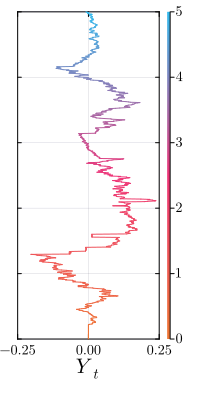

In [6]:
fine_grid_exponent = 18
fine_grid_size = 2^fine_grid_exponent+1
fine_grid_step = T/(fine_grid_size-1)    
fine_grid = collect(0:fine_grid_step:T)

plot_grid_exponent = 10
plot_grid_size = 2^plot_grid_exponent+1
plot_grid_indexes = 1:2^(fine_grid_exponent - plot_grid_exponent):fine_grid_size

pal = Plots.PlotThemes.theme_palette(:vibrant)
pal_grad = pal[[1,4,3]]

pl2 = plot(title="", xlabel=L"Y_t", ylabel="", xlim=(-0.25,0.25), xticks=-1:0.25:1, ylim=(0,5), yticks=(0:1:5, fill("", 5)),
            size=(200,400), grid=true, minorgrid=false, framestyle=:box,
            fontfamily="Computer Modern", titlefontsize=10, legendfontsize=9, xlabelfontsize=14, ylabelfontsize=14,
            xtickfont=font(9, "Computer Modern"), ytickfont=font(9, "Computer Modern"),
            right_margin=-10Plots.mm, legend=:bottomleft,)

for i in 1:plot_grid_size-1
    plot!(pl2, [Y[plot_grid_indexes[i]], Y[plot_grid_indexes[i+1]]], [fine_grid[plot_grid_indexes[i]], fine_grid[plot_grid_indexes[i+1]]],
        label="", color=cgrad(pal_grad)[i/plot_grid_size], linewidth=1)
end

Plots.gr_cbar_width[] = 0.0075
    
plot!(pl2, 100 .+(0:1:T), 100 .+(0:1:T), label="", zcolor=(0:1:T), seriestype = :scatter, markersize=0,
        color=cgrad(pal_grad), colorbar_orientation=:horizontal)
    
annotate!(pl2, (0.675, 2.55, text(L"t", 14, rotation=90, halign=:center)))

display(pl2)

In [ ]:
function Euler_method_strong_errors(T, min_grid_exponent, max_grid_exponent, fine_grid_exponent, sample_size)    
    fine_grid_size = 2^fine_grid_exponent+1
    fine_grid_step = T/(fine_grid_size-1)
    fine_grid = collect(0:fine_grid_step:T)
    
    OU = Vector{Float64}(undef, fine_grid_size)
    OU_random_increments = Vector{Float64}(undef, fine_grid_size-1)
    P = zeros(fine_grid_size)
    Y = Vector{Float64}(undef, fine_grid_size)
    
    ν = 1
    σ = 0.25    
    s = σ * sqrt((1 - exp(-2*ν*fine_grid_step))/(2*ν))

    X_exact = Vector{Float64}(undef, fine_grid_size)
    V_exact = Vector{Float64}(undef, fine_grid_size)
    
    errors = Matrix{Float64}(undef, max_grid_exponent-min_grid_exponent+1, sample_size)
    
    for n in 1:sample_size
        rand!(rng, Normal(0,s), OU_random_increments)
    
        OU[1] = rand(rng, Normal(0,1))
    
        for i in 1:fine_grid_size-1
            OU[i+1] = OU[i] * exp(-ν*fine_grid_step) + OU_random_increments[i]
        end
        
        P = zeros(fine_grid_size)
        
        elapsed_t = 0

        while elapsed_t <= T
            elapsed_t += rand(rng, Exponential(0.2))
            P +=  rand(rng, Uniform(-0.45,0.45)) .* (fine_grid .>= elapsed_t) 
        end
    
        Y = OU .* P
    
        X_0 = 1
        V_0 = 0
    
        X_exact[1] = X_0
        V_exact[1] = V_0
    
        for i in 1:fine_grid_size-1
            dX, dV = f(X_exact[i], V_exact[i], Y[i])
            X_exact[i+1] = X_exact[i] + fine_grid_step * dX
            V_exact[i+1] = V_exact[i] + fine_grid_step * dV
        end
        
        for grid_exponent in min_grid_exponent:max_grid_exponent
            grid_size = 2^grid_exponent + 1
            grid_step = T/(grid_size-1)
            grid_indexes = 1:2^(fine_grid_exponent - grid_exponent):fine_grid_size
            
            X_Euler = Vector{Float64}(undef, grid_size)
            V_Euler = Vector{Float64}(undef, grid_size)
          
            X_Euler[1] = X_0
            V_Euler[1] = V_0
        
            for i in 1:grid_size-1
                dX, dV = f(X_Euler[i], V_Euler[i], Y[grid_indexes[i]])
                X_Euler[i+1] = X_Euler[i] + grid_step * dX
                V_Euler[i+1] = V_Euler[i] + grid_step * dV
            end
            
            errors[grid_exponent-min_grid_exponent+1, n] = maximum(sqrt.((X_Euler-X_exact[grid_indexes]).^2+(V_Euler-V_exact[grid_indexes]).^2))
        end
    end
    
    return mean(errors, dims=2)
end

    
T = 5

min_grid_exponent = 5
max_grid_exponent = 10
fine_grid_exponent = 20
sample_size = 1_000

strong_errors = Euler_method_strong_errors(T,min_grid_exponent,max_grid_exponent,fine_grid_exponent,sample_size)

grid_steps = T ./ (2 .^(min_grid_exponent:1:max_grid_exponent))
log_grid_steps = log2.(grid_steps)
    
log_strong_errors = log2.(strong_errors)
X = [ones(size(log_grid_steps)) log_grid_steps]
p = X \ log_strong_errors

In [ ]:
pl3 = plot(title="", xlabel=L"\log_{\!2}\,\Delta t",
    size=(400,400), grid=true, minorgrid=false, framestyle=:box,
    fontfamily="Computer Modern", titlefontsize=15, legendfontsize=9, xlabelfontsize=14,
    xtickfont=font(9, "Computer Modern"), ytickfont=font(9, "Computer Modern"),)

scatter!(pl3, [], [], label=L"\log_{\!2}\,\mathrm{error}(\Delta t)", color=1, marker=:circle, markerstrokewidth=1,
        markerstrokecolor=:black, markeralpha=0.9)
        
plot!(pl3, log_grid_steps, p[1] .+ p[2] .* log_grid_steps, label=L"C(\Delta t)^p"*" fit with p = "*@sprintf("%.2f", p[2]),
    color=2, linewidth=2)

scatter!(pl3, log_grid_steps, log_strong_errors, label="", color=1, marker=:circle, markerstrokewidth=1,
        markerstrokecolor=:black, markeralpha=0.9)

nothing
display(pl3)

In [ ]:
layout = @layout [a{0.4w} b{0.2w} c{0.4w}]
pl = plot(pl1, pl2, pl3; layout=layout, size=(1_000,400), bottom_margin=4Plots.mm, left_margin=4Plots.mm)
display(pl)

In [ ]:
savefig(pl, "Euler_method_harmonic_oscillator.pdf")